<a href="https://colab.research.google.com/github/joaofelipefarinha/rh_ibm/blob/main/ibm_rh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. INTRODUÇÃO

A análise a seguir foi baseada nos dados da IBM, disponibilizados no site Kaggle.

O estudo foi objetivado para entender padrões de saída e entrada de colaboradores, a fim de melhorar a qualidade do trabalho
e otimizar os resultados da empresa.

Perguntas a serem respondidas:

1) Há diferença na saída de homens e mulheres?
2) Há diferença salarial entre homens e mulheres?
3) O relação entre salário e saída da empresa?
4) Há relação entre tempo de empresa e cargo? e tempo de empresa e salário?

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


# 2. CARREGANDO DATASET

In [ ]:
#carregando dataset

caminho = 'rh_ibm.csv'

df = pd.read_csv(caminho)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#resumo das colunas

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
!pip install matplotlib

In [ ]:
#contagem linhas e colunas

df.shape

(1470, 35)

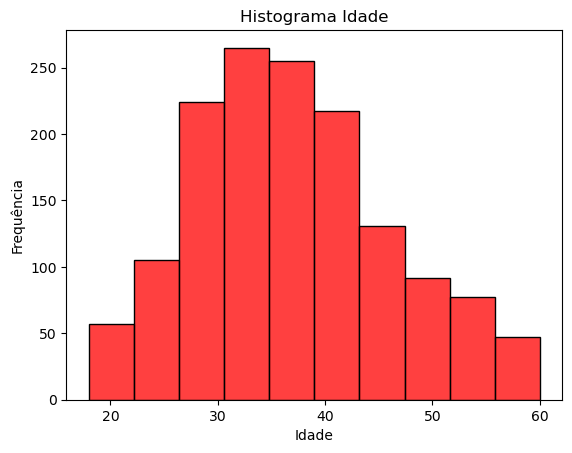

In [ ]:
# Supondo que seu DataFrame seja chamado df e a coluna seja 'coluna_desejada'
sns.histplot(df['Age'], bins=10, kde=False, color='Red')
plt.title('Histograma Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

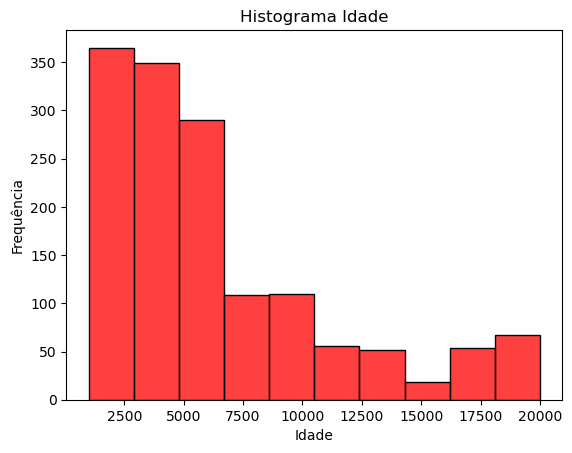

In [ ]:
# Supondo que seu DataFrame seja chamado df e a coluna seja 'coluna_desejada'
sns.histplot(df['MonthlyIncome'], bins=10, kde=False, color='Red')
plt.title('Histograma Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [ ]:
#propoção entre funcionários homens e mulheres

df.Gender.value_counts(1)*100

Male      60.0
Female    40.0
Name: Gender, dtype: float64

In [ ]:
#contar a quantidade de funcionários de acordo com seu campo de estudo.

df.EducationField.value_counts(1)*100

Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64

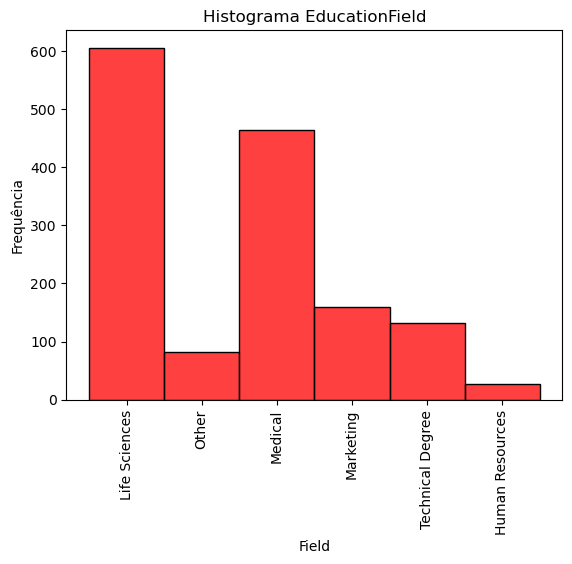

In [ ]:
sns.histplot(df['EducationField'], bins=5, kde=False, color='Red')
plt.title('Histograma EducationField')
plt.xlabel('Field')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Gênero')

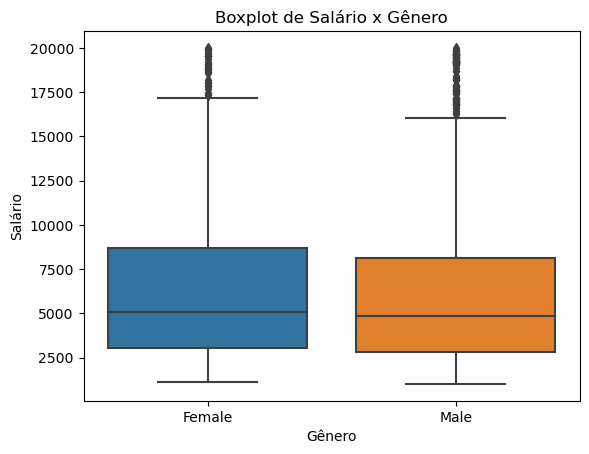

In [ ]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)
plt.title('Boxplot de Salário x Gênero')
plt.ylabel('Salário')
plt.xlabel('Gênero')

Embora os boxplots sejam parecidos, realizaremos um teste de hipótese estatístico para verificar se h

In [ ]:
# Divida o DataFrame com base no gênero
salario_homem = df[df['Gender'] == 'Male']['MonthlyIncome']
salario_mulher = df[df['Gender'] == 'Female']['MonthlyIncome']

# Realize o teste t
t_statistic, p_value = scipy.stats.ttest_ind(salario_homem, salario_mulher)

print(f'Test Statistic: {t_statistic}')
print(f'Valor p: {p_value}')

Test Statistic: -1.2212617308870655
Valor p: 0.22218303455087898


Podemos observar pelo p-valor 0.13 que a 0.05 de confiança não podemos afirmar que há diferença estatística entre os salários
de homens e mulheres.

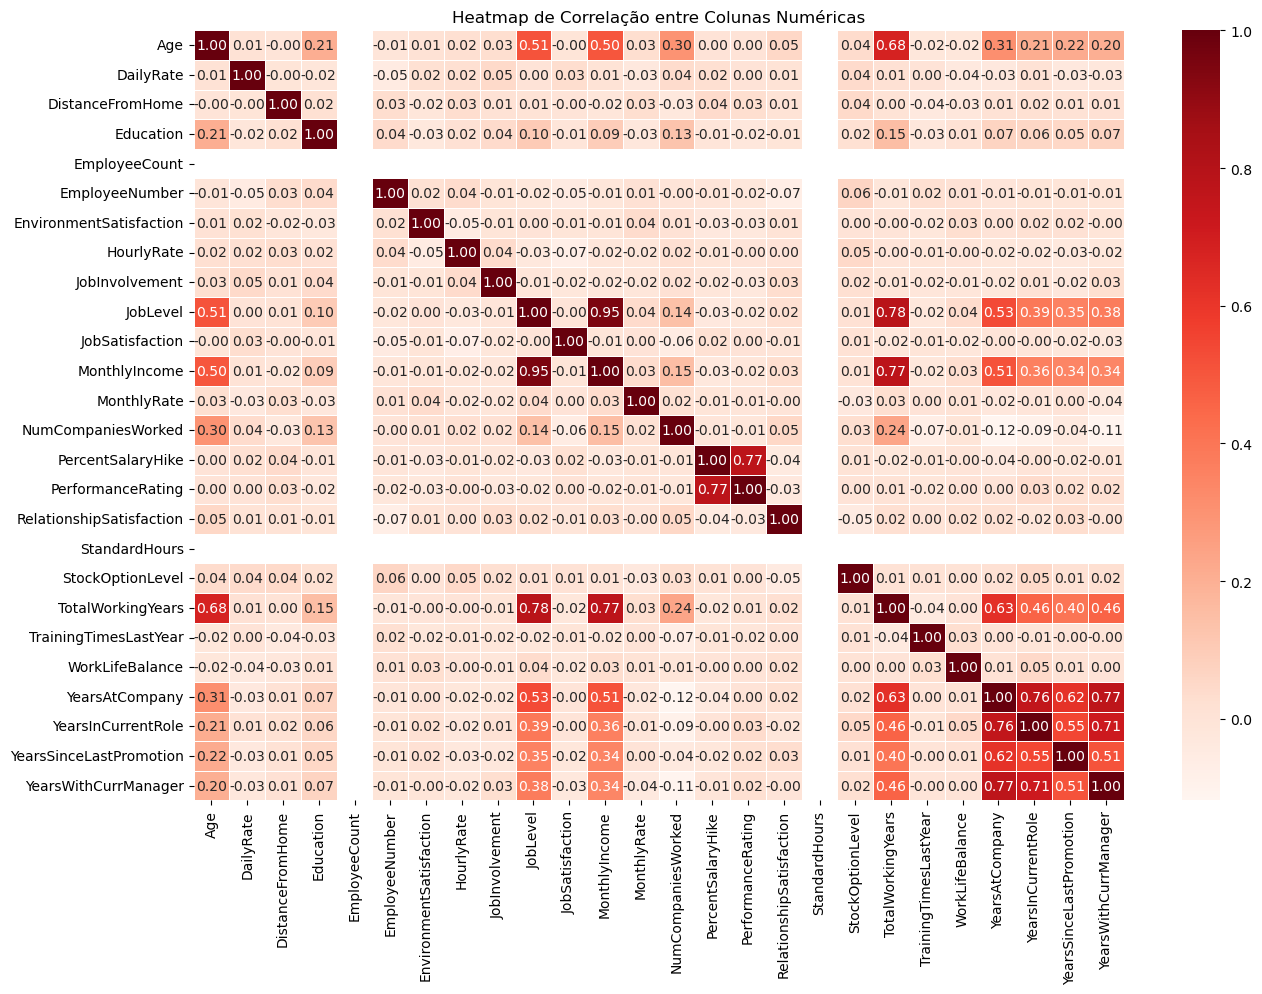

In [ ]:
#exibir uma matriz que mostra o grau de correlação entre as variáveis numéricas

numeric_columns = df.select_dtypes(include='number')

# Calcula a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Cria o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Heatmap de Correlação entre Colunas Numéricas')
plt.show()

In [ ]:
#media salarial por cargo e a quantidade de pessoas por nível de cargo.

media_salario_nivel = df.groupby('JobLevel')['MonthlyIncome'].sum()/df['JobLevel'].value_counts()
nivel_cargo = df['JobLevel'].value_counts()

print(f'A média salárial por cargo é: {media_salario_nivel}')
print(f'A quantidade de pessoas por nível de cargo é: {nivel_cargo}')

A média salárial por cargo é: JobLevel
1     2786.915285
2     5502.277154
3     9817.252294
4    15503.783019
5    19191.826087
dtype: float64
A quantidade de pessoas por nível de cargo é: 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


De forma que quanto mais escuro, mais forte a relação, é possível perceber que há variáveis correlacionadas.

In [ ]:
#contagem do estado civil dos funcionários

df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
#Procurar saber se há uma diferença na quantidade de treinamentos realizados por mulheres e homens no último ano

porcentagem = df.groupby('Gender')['TrainingTimesLastYear'].value_counts(normalize=True) * 100

porcentagem

Gender  TrainingTimesLastYear
Female  2                        36.564626
        3                        33.163265
        5                         9.013605
        4                         8.333333
        6                         5.102041
        1                         4.421769
        0                         3.401361
Male    2                        37.641723
        3                        33.560091
        4                         8.390023
        5                         7.482993
        1                         5.102041
        6                         3.968254
        0                         3.854875
Name: TrainingTimesLastYear, dtype: float64

In [ ]:
#Analisar se há diferença entre a frequencia de treinamentos de homens e mulheres


treinamento_homem = df[df['Gender'] == 'Male']['TrainingTimesLastYear']
treinamento_mulher = df[df['Gender'] == 'Female']['TrainingTimesLastYear']

# Realize o teste t
t_statistic, p_value = scipy.stats.ttest_ind(treinamento_homem, treinamento_mulher)

print(f'Test Statistic: {t_statistic}')
print(f'Valor p: {p_value}')

Test Statistic: -1.4872130264975696
Valor p: 0.13717330428095065


Podemos observar pelo p-valor 0.13 que a 0.05 de confiança não podemos afirmar que há diferença estatística entre a frequência
de treinamentos entre homens e mulheres.

Agora vamos analisar um pouco a coluna "Atrittion" e ver se há algumas relação com outras variáveis.

In [ ]:
#relação entre a função e se atittion.

porcentagem = df.groupby('JobRole')['Attrition'].value_counts(normalize=True) * 100

porcentagem


JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative       No           60.240964
                           Yes          39.759036
Name: Attrition, dtype: float64

media_salarial_cargo = df.groupby('JobRole')['MonthlyIncome'].mean()

media_salarial_cargo.sort_index()


Podemos observar que o cargo que tem a menor média salarial (Sales Representative) também é a que tem a maior
porcentagem de saída de pessoas da empresa.

In [ ]:
#relação entre a função e se atittion.

porcentagem = df.groupby('JobRole')['JobSatisfaction'].value_counts(normalize=True) * 100

porcentagem

JobRole                    JobSatisfaction
Healthcare Representative  3                  32.824427
                           4                  32.824427
                           1                  19.847328
                           2                  14.503817
Human Resources            2                  30.769231
                           3                  25.000000
                           4                  25.000000
                           1                  19.230769
Laboratory Technician      4                  30.888031
                           3                  28.957529
                           1                  21.621622
                           2                  18.532819
Manager                    4                  32.352941
                           3                  26.470588
                           1                  20.588235
                           2                  20.588235
Manufacturing Director     3                  33.793103
     

Vamos procurar fazer uma análisa baseada na faixa etária dos funcionários. para isso, vamos criar uma coluna com a ajuda
da coluna "Age"

In [ ]:
# Função para atribuir classes com base nos gastos médios
def atribuir_classe(valor):
    if valor >= 18 and valor < 29:
        return '18-28'
    if valor >=29 and valor < 40:
        return '29-39'
    if valor >= 40 and valor < 50:
        return '40-49'
    if valor >= 50 and valor < 60:
        return '50-59'
    elif valor >= 60:
        return '60+'

# Aplicar a função à coluna existente para criar a nova coluna 'classe'
df['faixa_etaria'] = df['Age'].apply(atribuir_classe)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,satisfacao_tempo,faixa_etaria
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,Antigo,40-49
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,Antigo,40-49
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,Novo,29-39
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,Antigo,29-39
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,Novo,18-28


In [ ]:
porcentagem = df.groupby('faixa_etaria')['Attrition'].value_counts(normalize=True) * 100

porcentagem

TrainingTimesLastYear  Attrition
0                      No           72.222222
                       Yes          27.777778
1                      No           87.323944
                       Yes          12.676056
2                      No           82.084095
                       Yes          17.915905
3                      No           85.947047
                       Yes          14.052953
4                      No           78.861789
                       Yes          21.138211
5                      No           88.235294
                       Yes          11.764706
6                      No           90.769231
                       Yes           9.230769
Name: Attrition, dtype: float64

In [ ]:
porcentagem = df.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=True) * 100

porcentagem

In [ ]:
#analise para verificar se há uma relação entre a quantidade de hora extra e saída da empresa

porcentagem = df.groupby('OverTime')['Attrition'].value_counts(normalize=True) * 100

porcentagem

OverTime  Attrition
No        No           89.563567
          Yes          10.436433
Yes       No           69.471154
          Yes          30.528846
Name: Attrition, dtype: float64

Percebemos que funcionários que não fizeram treinamentos no último ano possuem maiores chances de sair da empresa.

In [ ]:
#teste estatistico para confirmar se há uma relação entre as duas colunas categóricas

contingency_table = pd.crosstab(df['OverTime'], df['Attrition'])

# Realize o teste qui-quadrado de independência
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(contingency_table)

print(f'Estatística Qui-Quadrado: {chi2_stat}')
print(f'Valor p: {p_value}')

Estatística Qui-Quadrado: 87.56429365828768
Valor p: 8.15842372153832e-21


Pelo valor do p-valor ser muito baixo, podemos afirmar a 0.05 de confiança que os valores de Overtime e Attrition têm
têm uma relação.

# CONCLUSÕES

- é possivel perceber que há uma valorização do funcionário na empresa, pois as variáveis salário, cargo e
aumento salarial crescem de acordo com o tempo de empresa e desempenho do colaborador.
- Há o dobro de homens ocupando o cargo de nível mais alto da empresa se comparado a quantidade de mulheres
- A satisfação com a empresa está ligada com o tamanho do salário
- Podemos observar que o cargo que tem a menor média salarial (Sales Representative) também é a que tem a maior
porcentagem de saída de pessoas da empresa.
- Percebemos que funcionários que não fizeram treinamentos no último ano possuem maiores chances de sair da empresa.

Melhorias e Sugestões

- Criar novos "níveis" para classificação de desempenho, pois só há notas 3 ou 4;
- Criar um programa que vise estimular os funcionários a realizarem os os treinamentos oferecidos, já que colaboradores que
realizam cursos de capacitação estão menos propensos a abandonarem a empresa;
- Buscar entender o motivo dos jovens talentos terem uma porcentagem maior de saída da empresa. Isso pode ser feito através
de uma pesquisa de satisfação ou relatório de acompanhamento.
- Diminuir as horas extras da empresa, pois isso está relacionado à saída do funcionário;
- Buscar entender o motivo dos funcionários que ocupam o cargo de "Sales Representative" terem uma taxa mais alta de saída
da empresa.

